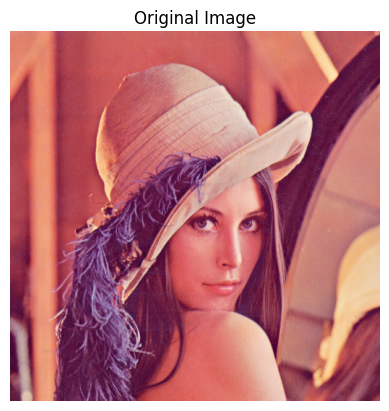

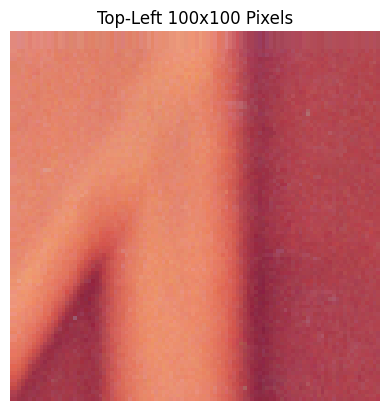

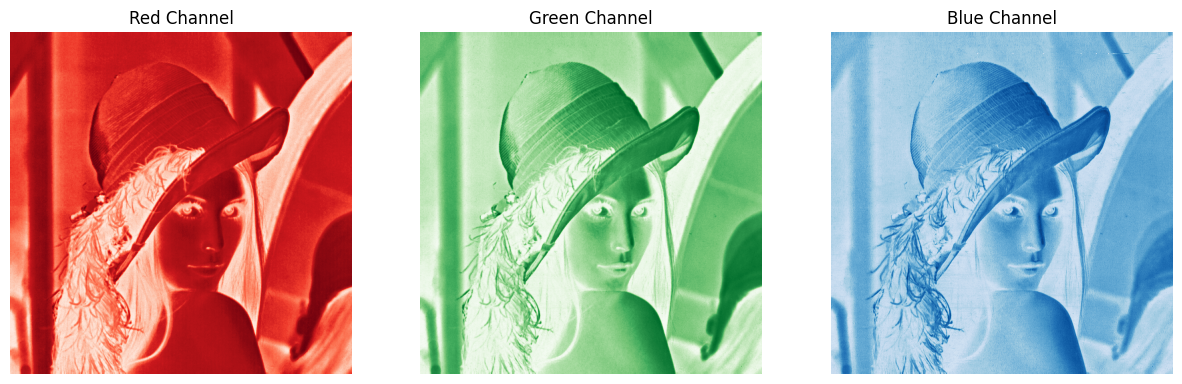

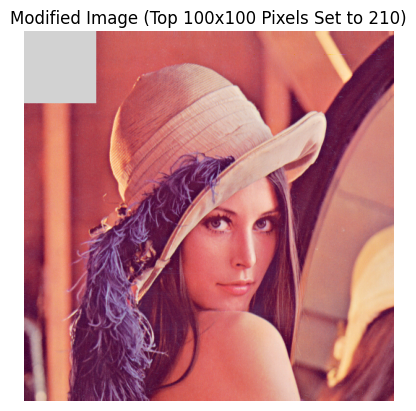

In [23]:

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and display the image
image_path = "Lenna_(test_image).png"  # Replace with the actual image path
img = Image.open(image_path)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Convert image to NumPy array
img_array = np.array(img)

# Extract and display top-left 100x100 pixels
top_left = img_array[:100, :100]
plt.imshow(top_left)
plt.title("Top-Left 100x100 Pixels")
plt.axis("off")
plt.show()

# Split the image into R, G, B channels
r, g, b = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]

# Display each channel
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(r, cmap='Reds')
axs[0].set_title("Red Channel")
axs[0].axis("off")

axs[1].imshow(g, cmap='Greens')
axs[1].set_title("Green Channel")
axs[1].axis("off")

axs[2].imshow(b, cmap='Blues')
axs[2].set_title("Blue Channel")
axs[2].axis("off")

plt.show()

# Modify top 100x100 pixels to value 210
img_array[:100, :100] = 210
modified_img = Image.fromarray(img_array)
plt.imshow(modified_img)
plt.title("Modified Image (Top 100x100 Pixels Set to 210)")
plt.axis("off")
plt.show()


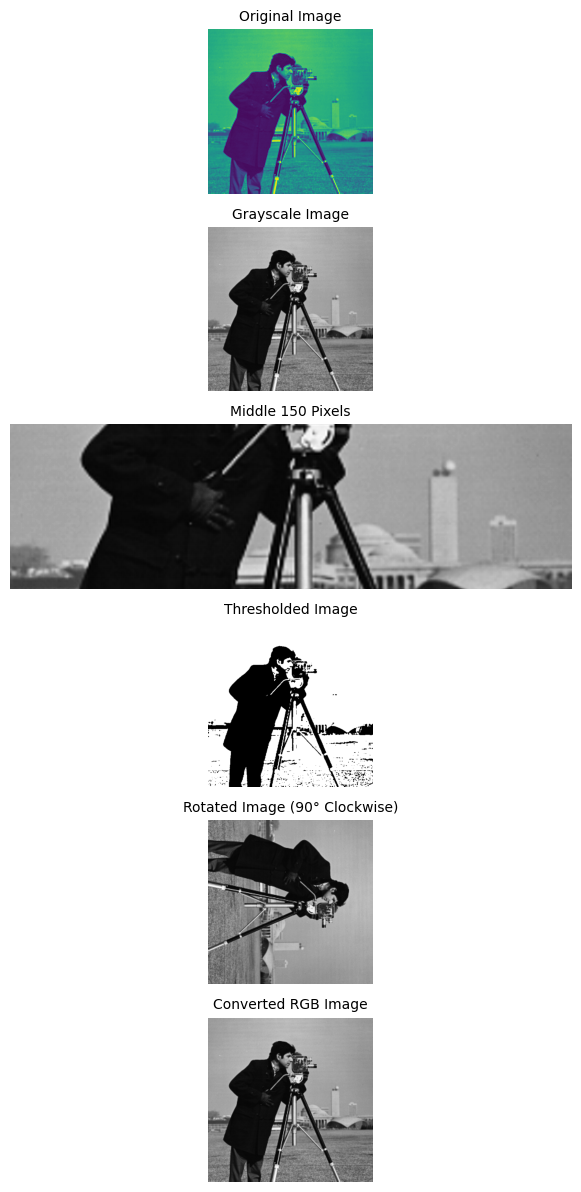

In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Ask user for the image path
image_path = 'cameraman.png'

# Load the image
img = Image.open(image_path)

# Convert image to grayscale
gray_img = img.convert("L")
gray_array = np.array(gray_img)

# Extract middle 150 pixels
center_y = gray_array.shape[0] // 2
middle_section = gray_array[center_y - 75:center_y + 75, :]

# Apply threshold (binary image)
thresholded = np.where(gray_array < 100, 0, 255)

# Rotate image 90 degrees clockwise
rotated_img = gray_img.rotate(-90)

# Convert grayscale to RGB
rgb_from_gray = np.stack([gray_array] * 3, axis=-1)

# Adjust figure size to prevent excessive scrolling
fig, axs = plt.subplots(6, 1, figsize=(6, 12))  # Reduced height

# Plot images in a vertical layout without too much white space
image_titles = [
    "Original Image", "Grayscale Image", "Middle 150 Pixels",
    "Thresholded Image", "Rotated Image (90° Clockwise)", "Converted RGB Image"
]
image_data = [img, gray_img, middle_section, thresholded, rotated_img, rgb_from_gray]
colormaps = [None, 'gray', 'gray', 'gray', 'gray', None]

for i, ax in enumerate(axs):
    ax.imshow(image_data[i], cmap=colormaps[i])
    ax.set_title(image_titles[i], fontsize=10)  # Smaller titles to save space
    ax.axis("off")

plt.tight_layout(pad=1)  # Reduce padding for compact display
plt.show()


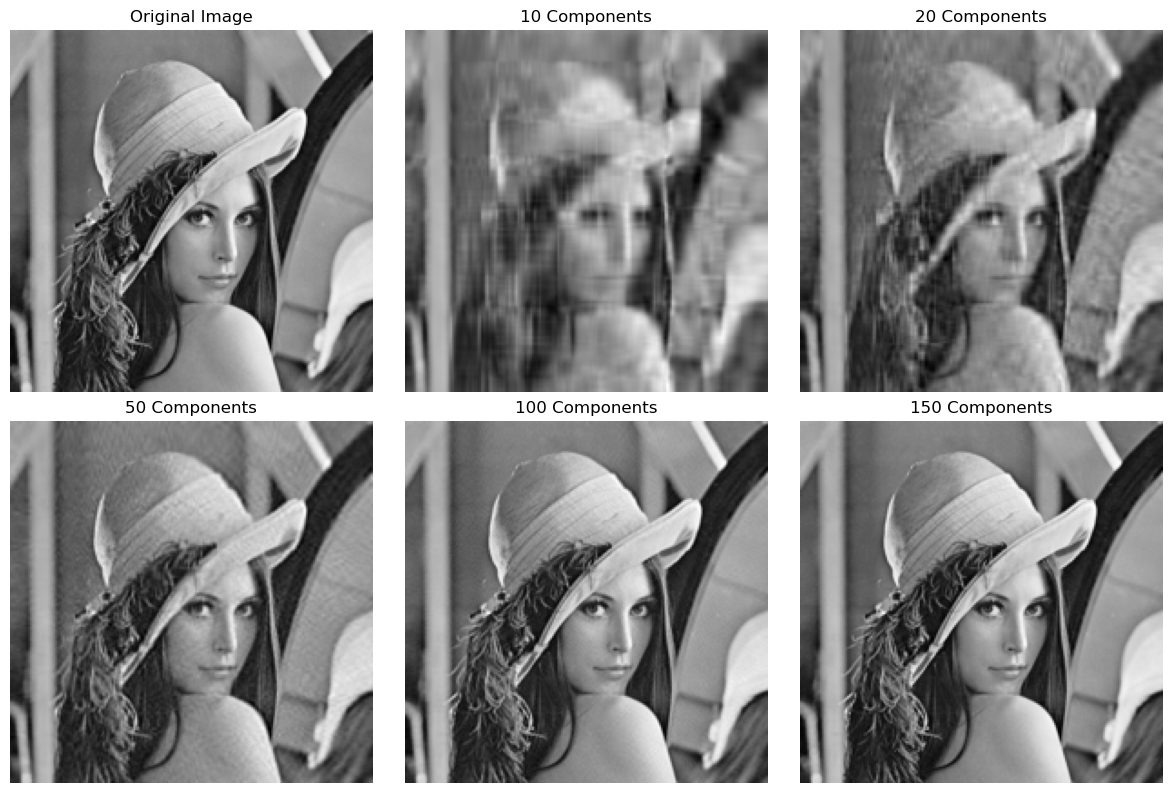

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Specify the image file path here
image_path = "Lenna_(test_image).png"  # <-- Change this to your image path

# Load the image
img = Image.open(image_path)

# Convert to grayscale and resize for efficiency
gray_img = img.convert("L")
resized_img = gray_img.resize((200, 200))  # Resize for faster PCA processing
gray_array = np.array(resized_img) / 255.0  # Normalize pixel values

# Define the list of PCA components to visualize
components = [10, 20, 50, 100, 150]

# Perform PCA with different numbers of components and reconstruct images
reconstructed_images = []
for n_components in components:
    pca = PCA(n_components)
    compressed = pca.fit_transform(gray_array)  # Reduce dimensions
    reconstructed = pca.inverse_transform(compressed)  # Reconstruct image
    reconstructed_images.append(reconstructed)

# Plot original and reconstructed images
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Original image
axs[0, 0].imshow(gray_array, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 0].axis("off")

# Reconstructed images with different components
for i, (comp, rec_img) in enumerate(zip(components, reconstructed_images)):
    row = (i + 1) // 3  # Row index (0 or 1)
    col = (i + 1) % 3  # Column index

    axs[row, col].imshow(rec_img, cmap='gray')
    axs[row, col].set_title(f"{comp} Components")
    axs[row, col].axis("off")

# Hide any empty subplot
axs[1, 2].axis("off")

plt.tight_layout()
plt.show()
